In [ ]:
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#글씨체 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 꽃샘추위 추이 그래프

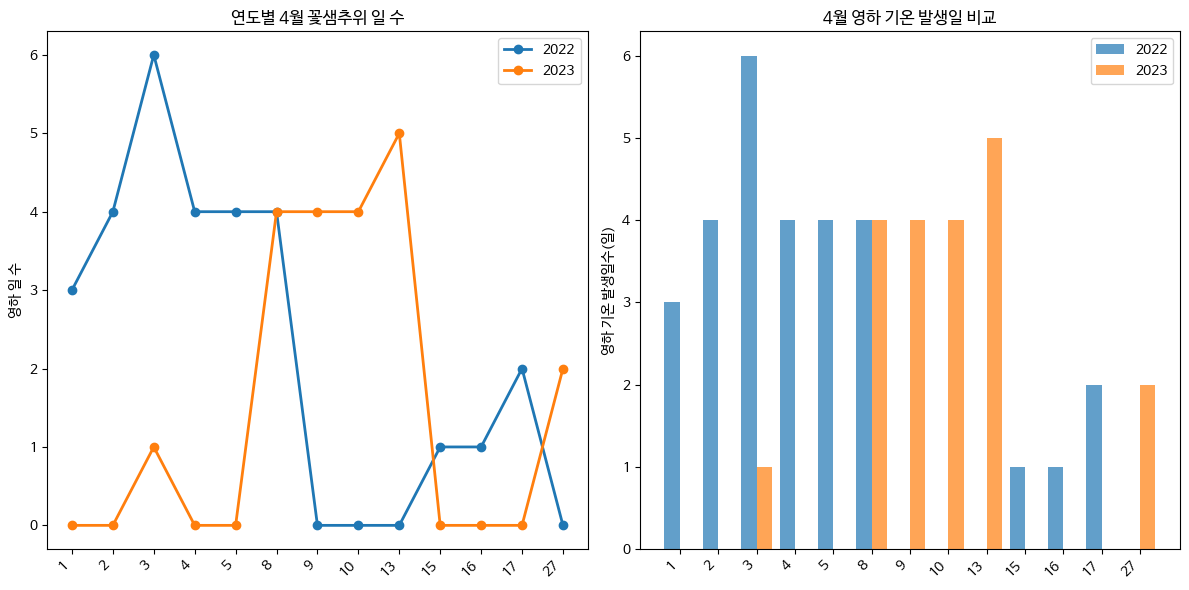

In [ ]:
# 주어진 데이터
dates = ["{}".format(i) for i in range(1, 31)]
values_2022 = [3, 4, 6, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
values_2023 = [0, 0, 1, 0, 0, 0, 0, 4, 4, 4, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]

# 0이 아닌 값을 가진 날짜 필터링
non_zero_dates = [date for date, value in zip(dates, values_2022) if value != 0 or values_2023[dates.index(date)] != 0]

# 0이 아닌 값만을 가진 데이터 추출
non_zero_values_2022 = [values_2022[dates.index(date)] for date in non_zero_dates]
non_zero_values_2023 = [values_2023[dates.index(date)] for date in non_zero_dates]

# 선 그래프를 위한 subplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(non_zero_dates, non_zero_values_2022, marker='o', linestyle='-', linewidth=2, label='2022')
plt.plot(non_zero_dates, non_zero_values_2023, marker='o', linestyle='-', linewidth=2, label='2023')
plt.title('연도별 4월 꽃샘추위 일 수')
plt.ylabel('영하 일 수')
plt.xticks(non_zero_dates, rotation=45, ha="right")
plt.legend()

# 막대 그래프를 위한 subplot
plt.subplot(1, 2, 2)
bar_width = 0.4
bar_positions = np.arange(len(non_zero_dates))
plt.bar(bar_positions - bar_width/2, non_zero_values_2022, width=bar_width, label='2022', alpha=0.7)
plt.bar(bar_positions + bar_width/2, non_zero_values_2023, width=bar_width, label='2023', alpha=0.7)
plt.title('4월 영하 기온 발생일 비교')
plt.ylabel('영하 기온 발생일수(일)')
plt.xticks(bar_positions, non_zero_dates, rotation=45, ha="right")
plt.legend()

# 그래프 표시
plt.tight_layout()
plt.show()


# 재해와 보험금

In [ ]:
ap_d = pd.read_excel('/content/drive/MyDrive/KDI/재해와 보험.xlsx')

In [ ]:
#null값 = 0
ap_d = ap_d.fillna(0)

In [ ]:
ap_d

,연도,풍수해,냉해,한해,기타,지급보험금
0,2015,14318.00,1563.00,6131.0,5978.0,30987
1,2016,37667.00,16828.00,3999.0,16667.0,39288
2,2017,29971.00,4674.00,438.0,13446.0,149737
3,2018,135020.00,61558.00,50466.0,22509.0,250265
4,2019,97941.00,80846.00,14589.0,0.0,415893
5,2020,203576.00,158105.00,43554.0,0.0,441396
6,2021,132078.00,45085.00,40173.0,0.0,181138
7,2022,62375.29,0.20,1336.0,819.3,138563
8,2023,84951.09,41314.44,0.0,5302.2,204738


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


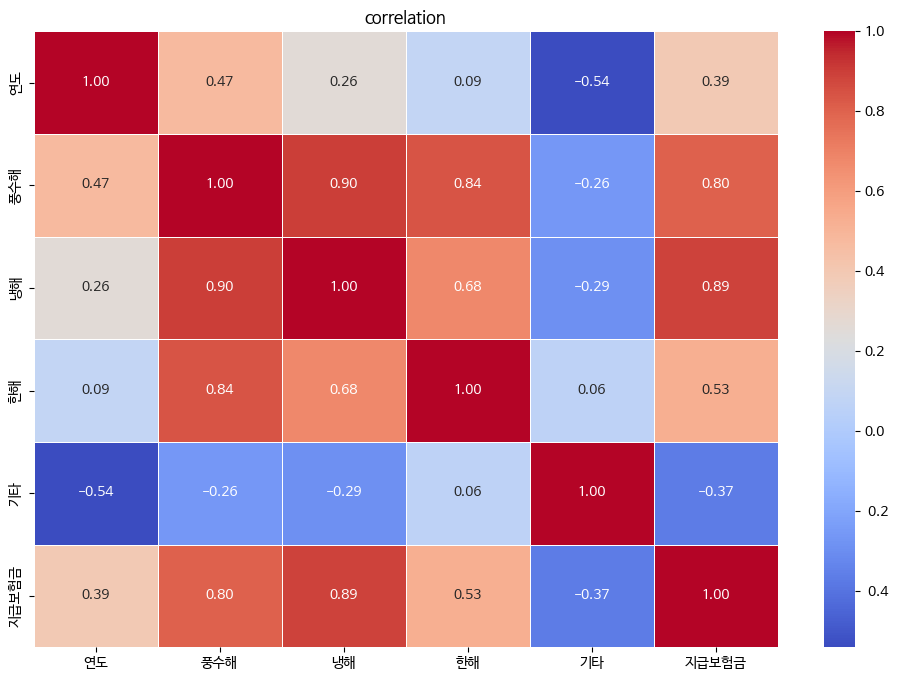

In [ ]:
# 상관관계 계산
correlation_matrix = ap_d.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('correlation')
plt.show()

In [ ]:
# 특성과 타겟 분리
X = ap_d.drop(['연도', '지급보험금'], axis=1)
y = ap_d['지급보험금']

# Normalize the target variable
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# Standardize (normalize) the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor(random_state=42)

# 모델 훈련
rf_model.fit(X_train_scaled, y_train)

# 테스트 데이터로 예측
y_pred_scaled = rf_model.predict(X_test_scaled)

# 모델 평가 (예를 들어, 평균 제곱 오차를 사용)
mse = mean_squared_error(y_test, y_pred_scaled)
print(f'Mean Squared Error (scaled): {mse}')

# 특성 중요도 출력
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)


Mean Squared Error (scaled): 0.18825313638333
     Importance
냉해     0.653662
풍수해    0.180861
기타     0.114565
한해     0.050912


In [ ]:
# 예측값을 원래 스케일로 변환
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# RMSE를 원래 스케일로 계산
rmse_original_scale = mean_squared_error(y_test, y_pred)**0.5
print(f'RMSE (original scale): {rmse_original_scale}')


RMSE (original scale): 140776.46389859813


In [ ]:
import math
mse = 0.18825313638333
rmse = math.sqrt(mse)
print(rmse)

0.43388147734528837


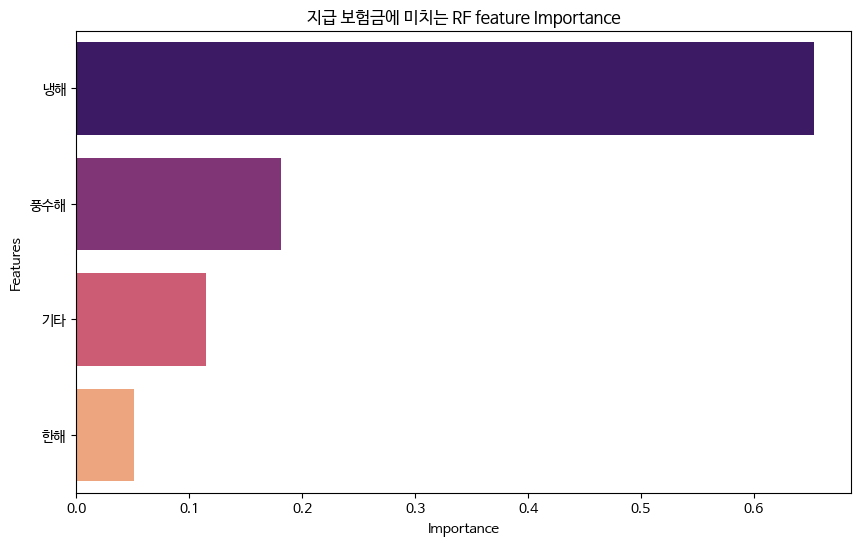

In [ ]:
# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances.index, palette="magma")
plt.title('지급 보험금에 미치는 RF feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [ ]:
# 훈련 데이터에 대한 예측
y_train_pred_scaled = rf_model.predict(X_train_scaled)

# Inverse transform the predicted values to get them back to the original scale
y_train_pred = y_scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()

# 훈련 데이터의 성능 평가
train_mse = mean_squared_error(y_train, y_train_pred_scaled)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f'Training Mean Squared Error (scaled): {train_mse}')
print(f'Training Mean Absolute Error: {train_mae}')
print(f'Training R-squared: {train_r2}')

# 테스트 데이터의 성능 평가는 이미 이전에 계산한 것이 있습니다.
print(f'Test Mean Squared Error (scaled): {mse}')
print(f'Test Mean Absolute Error: {mae}')
print(f'Test R-squared: {r2}')


Training Mean Squared Error (scaled): 0.07969248397257465
Training Mean Absolute Error: 231174.83862413975
Training R-squared: -66604063846.81365
Test Mean Squared Error (scaled): 0.18825313638333
Test Mean Absolute Error: 139529.1298155111
Test R-squared: -150305201587.8667


# 각 재해별 사과 가격

In [ ]:
disaster = pd.read_excel('/content/drive/MyDrive/KDI/재해별 사과가격.xlsx')

In [ ]:
disaster
disaster = disaster.fillna(0)

In [ ]:
disaster

,연도,풍수해,냉해,한해,기타,사과 소매가
0,2007-01-01,38502.00,28452.00,1917.0,0.0,38137
1,2008-01-01,9738.00,324.00,9404.0,0.0,28947
2,2009-01-01,17325.00,12330.00,0.0,0.0,13226
3,2010-01-01,92056.00,33192.00,42425.0,0.0,13534
4,2011-01-01,141391.00,88670.00,37403.0,0.0,20100
5,2012-01-01,332505.00,323766.00,0.0,0.0,26860
6,2013-01-01,29778.00,2401.00,26086.0,1200.0,30269
7,2014-01-01,31437.00,6270.00,3660.0,0.0,24450
8,2015-01-01,14318.00,1563.00,6131.0,5978.0,24450
9,2016-01-01,37667.00,16828.00,3999.0,16667.0,14077


In [ ]:
# 정수형 열을 날짜로 변환
disaster['연도'] = pd.to_datetime(disaster['연도'], format='%Y')

<ipython-input-20-085b55d1ec69>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = disaster.corr()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


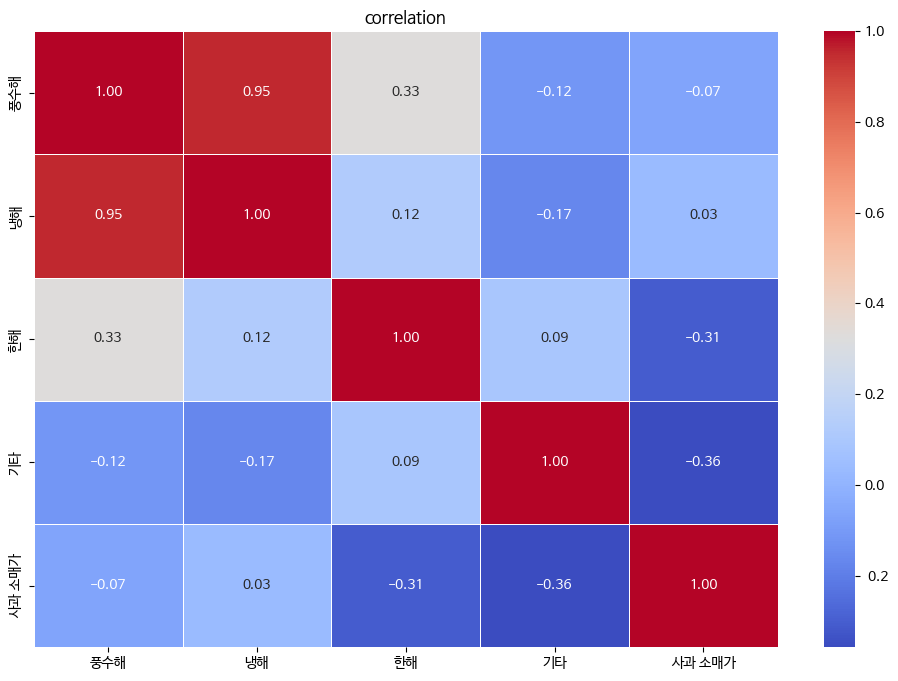

In [ ]:
# 상관관계 계산
correlation_matrix = disaster.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('correlation')
plt.show()

In [ ]:
disaster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연도      17 non-null     datetime64[ns]
 1   풍수해     17 non-null     float64       
 2   냉해      17 non-null     float64       
 3   한해      17 non-null     float64       
 4   기타      17 non-null     float64       
 5   사과 소매가  17 non-null     int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 944.0 bytes


# Random Forest MODEL

In [ ]:
# 특성과 타겟 분리
X = disaster.drop(['연도', '사과 소매가'], axis=1)
y = disaster['사과 소매가']

# Normalize the target variable
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# Standardize (normalize) the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor(random_state=42)

# 모델 훈련
rf_model.fit(X_train_scaled, y_train)

# 테스트 데이터로 예측
y_pred_scaled = rf_model.predict(X_test_scaled)

# Inverse transform the predicted values to get them back to the original scale
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# 모델 평가 (예를 들어, 평균 제곱 오차를 사용)
mse = mean_squared_error(y_test, y_pred_scaled)
print(f'Mean Squared Error (scaled): {mse}')

# 특성 중요도 출력
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)


Mean Squared Error (scaled): 2.659534436380809
     Importance
냉해     0.406921
풍수해    0.236232
한해     0.187140
기타     0.169708


In [ ]:
import math
mse = 2.659534436380809
rmse = math.sqrt(mse)
print(rmse)

1.6308079090992933


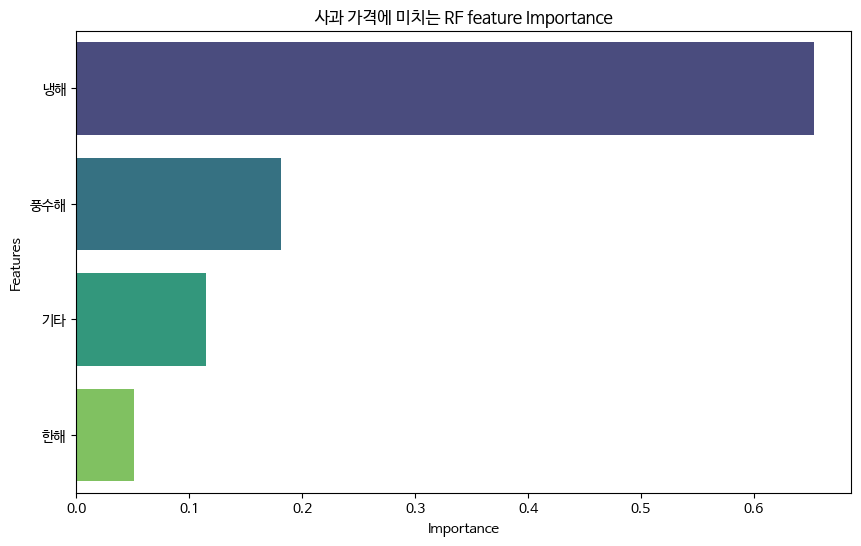

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances.index, palette="viridis")
plt.title('사과 가격에 미치는 RF feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
#feature: 재해, target: 사과가격


In [ ]:
ddd = pd.read_excel('/content/drive/MyDrive/KDI/총 재해피해 대비 사과가격.xlsx')

# MIN-MAX 스케일링 시

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 특성과 타겟 분리
X = disaster.drop(['연도', '사과 소매가'], axis=1)
y = disaster['사과 소매가']

# 특성과 타겟 변수를 min-max 스케일링
y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# 특성을 min-max 스케일링
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor(random_state=42)

# 모델 훈련
rf_model.fit(X_train_scaled, y_train)

# 테스트 데이터로 예측
y_pred_scaled = rf_model.predict(X_test_scaled)

# Inverse transform the predicted values to get them back to the original scale
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# 모델 평가 (예를 들어, 평균 제곱 오차를 사용)
mse = mean_squared_error(y_test, y_pred_scaled)
print(f'Mean Squared Error (scaled): {mse}')

# 특성 중요도 출력
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

Mean Squared Error (scaled): 0.20642543480671327
     Importance
냉해     0.404894
풍수해    0.227570
한해     0.185576
기타     0.181960


In [ ]:
reg = pd.read_excel('/content/drive/MyDrive/KDI/농작물재해보험 사과 데이터.xlsx')

# 물가 상승 대비 사과가격 추이

In [ ]:
time = pd.read_excel('/content/drive/MyDrive/KDI/가격 시계열 비교.xlsx')

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/KDI/농작물재해보험.xlsx')

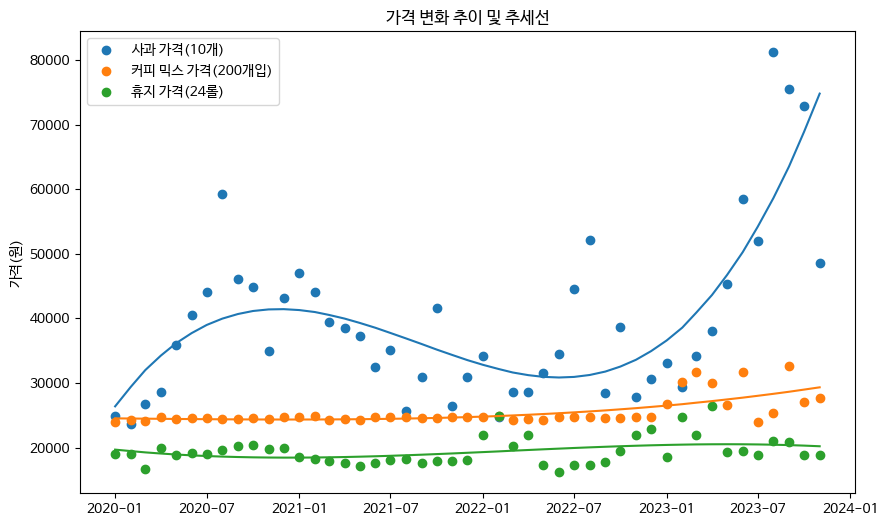

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
from scipy.optimize import curve_fit


# Convert '날짜' column to datetime format
time['날짜'] = pd.to_datetime(time['날짜'], format='%Y%m')

# Define a cubic polynomial function for fitting
def cubic_polynomial(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# 그래프 그리기
plt.figure(figsize=(10, 6))

# Scatter plot for data points
plt.scatter(time['날짜'], time['사과 가격'], label='사과 가격(10개)', marker='o')
plt.scatter(time['날짜'], time['커피 믹스 가격'], label='커피 믹스 가격(200개입)', marker='o')
plt.scatter(time['날짜'], time['휴지 가격'], label='휴지 가격(24롤)', marker='o')


# Polynomial trend lines
for column in ['사과 가격', '커피 믹스 가격', '휴지 가격']:
    x = np.arange(len(time))
    y = time[column]

    # Fit the cubic polynomial function to the data
    params, _ = curve_fit(cubic_polynomial, x, y)

    # Generate y values using the fitted parameters
    trend_line = cubic_polynomial(x, *params)

    # Plot the polynomial trend line without adding to the legend
    plt.plot(time['날짜'], trend_line, linestyle='-')

# 그래프에 제목과 축 레이블 추가
plt.title('가격 변화 추이 및 추세선')
plt.ylabel('가격(원)')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()


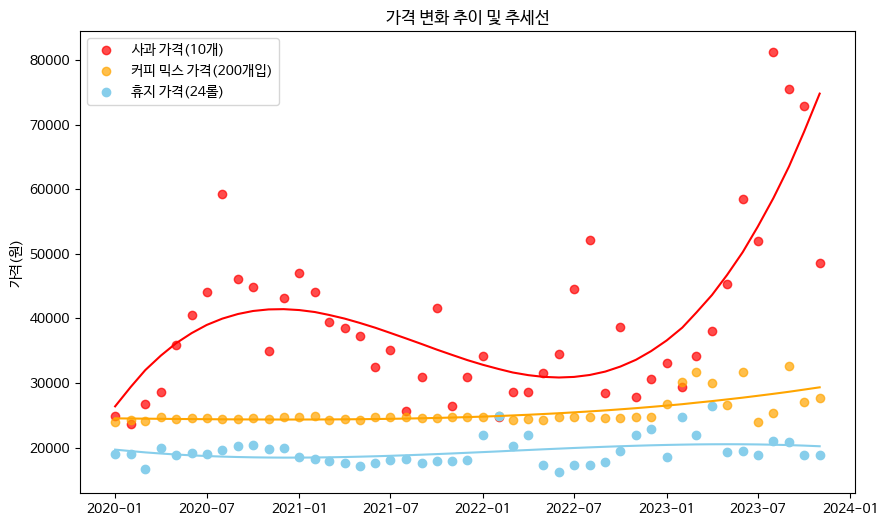

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# Assuming 'time' is your DataFrame

# Convert '날짜' column to datetime format
time['날짜'] = pd.to_datetime(time['날짜'], format='%Y%m')

# Define a cubic polynomial function for fitting
def cubic_polynomial(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# 그래프 그리기
plt.figure(figsize=(10, 6))

# Scatter plot for data points with custom colors
plt.scatter(time['날짜'], time['사과 가격'], label='사과 가격(10개)', marker='o', color='red', alpha=0.7)
plt.scatter(time['날짜'], time['커피 믹스 가격'], label='커피 믹스 가격(200개입)', marker='o', color='orange', alpha=0.7)
plt.scatter(time['날짜'], time['휴지 가격'], label='휴지 가격(24롤)', marker='o', color='skyblue')

# Polynomial trend lines with custom colors
colors = ['red', 'orange', 'skyblue']
for i, column in enumerate(['사과 가격', '커피 믹스 가격', '휴지 가격']):
    x = np.arange(len(time))
    y = time[column]

    # Fit the cubic polynomial function to the data
    params, _ = curve_fit(cubic_polynomial, x, y)

    # Generate y values using the fitted parameters
    trend_line = cubic_polynomial(x, *params)

    # Plot the polynomial trend line with custom line style and color
    plt.plot(time['날짜'], trend_line, linestyle='-', color=colors[i])

# 그래프에 제목과 축 레이블 추가
plt.title('가격 변화 추이 및 추세선')
plt.ylabel('가격(원)')

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()


월별 분석

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      45 non-null     int64  
 1   가입면적    45 non-null     int64  
 2   가입농가수   45 non-null     int64  
 3   가입건수    45 non-null     int64  
 4   가입농지수   45 non-null     int64  
 5   가입금액    45 non-null     int64  
 6   순보험료    45 non-null     int64  
 7   지급보험금   45 non-null     int64  
 8   가입률     45 non-null     float64
 9   사과 가격   45 non-null     int64  
dtypes: float64(1), int64(9)
memory usage: 3.6 KB


In [ ]:
# 정수형 열을 날짜로 변환
df['날짜'] = pd.to_datetime(df['날짜'], format='%Y%m')

<ipython-input-35-aca1e18ba0bd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


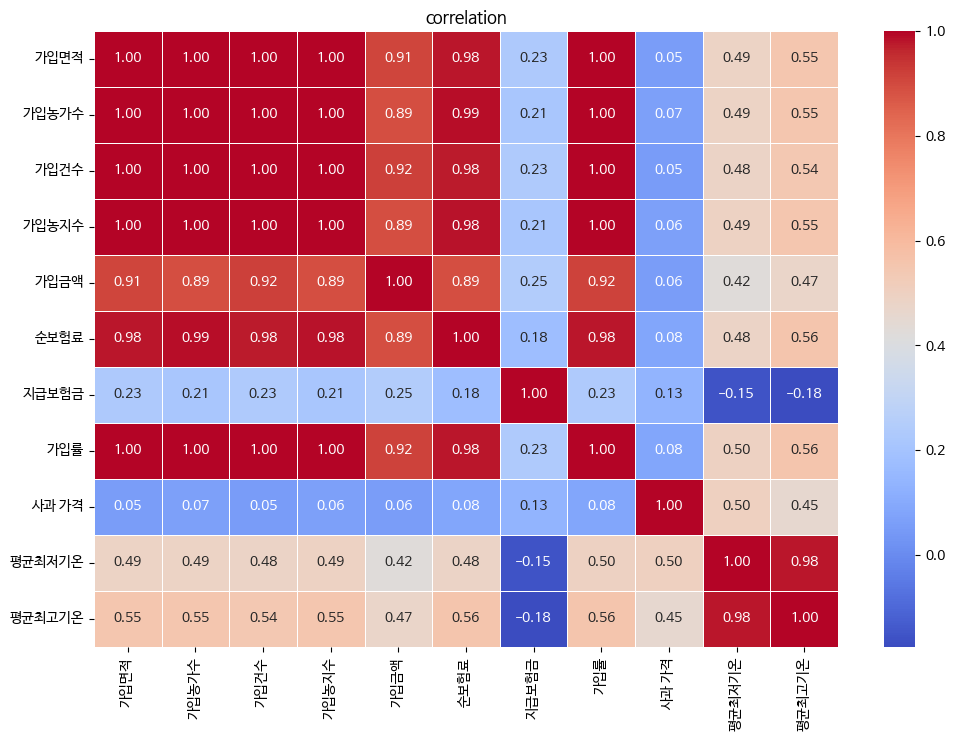

In [ ]:
# 상관관계 계산
correlation_matrix = df.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('correlation')
plt.show()

In [ ]:
correlation_matrix

,가입면적,가입농가수,가입건수,가입농지수,가입금액,순보험료,지급보험금,가입률,사과 가격,평균최저기온,평균최고기온
가입면적,1.000000,0.997816,0.999160,0.998624,0.908307,0.980423,0.230267,0.998277,0.053916,0.489064,0.550815
가입농가수,0.997816,1.000000,0.995552,0.999642,0.890196,0.987213,0.212221,0.996225,0.066227,0.489050,0.553082
가입건수,0.999160,0.995552,1.000000,0.996611,0.919543,0.975649,0.234727,0.998749,0.053282,0.483960,0.543908
가입농지수,0.998624,0.999642,0.996611,1.000000,0.891040,0.984247,0.213689,0.996550,0.064449,0.491078,0.554133
가입금액,0.908307,0.890196,0.919543,0.891040,1.000000,0.889990,0.245381,0.916510,0.055644,0.424650,0.474799
순보험료,0.980423,0.987213,0.975649,0.984247,0.889990,1.000000,0.176155,0.978173,0.083594,0.484788,0.555588
지급보험금,0.230267,0.212221,0.234727,0.213689,0.245381,0.176155,1.000000,0.233984,0.134177,-0.153435,-0.176283
가입률,0.998277,0.996225,0.998749,0.996550,0.916510,0.978173,0.233984,1.000000,0.081160,0.495854,0.556330
사과 가격,0.053916,0.066227,0.053282,0.064449,0.055644,0.083594,0.134177,0.081160,1.000000,0.500834,0.454142
평균최저기온,0.489064,0.489050,0.483960,0.491078,0.424650,0.484788,-0.153435,0.495854,0.500834,1.000000,0.978069


월별 분석

In [ ]:
reg

,날짜,농작물 재해 규모,가입면적,가입금액,순보험료,지급보험금,사과 소매가
0,2022-01-01,0.00,667,38713,6140,477,20890
1,2022-02-01,0.00,18972,1152118,188981,6693,22639
2,2022-03-01,287.00,23333,1420432,229362,6913,29930
3,2022-04-01,0.00,23326,1410715,229137,7025,31235
4,2022-05-01,819.30,23314,1409366,228982,7068,32670
5,2022-06-01,890.49,23304,1407857,228851,7085,35667
6,2022-07-01,1652.00,23723,1380673,225953,7103,36000
7,2022-08-01,2633.40,23375,1360746,223716,7139,37488
8,2022-09-01,54690.21,23373,1341847,222861,79268,25750
9,2022-10-01,0.00,23373,1341220,222820,81424,29747


In [ ]:
reg.columns

Index(['날짜', '농작물 재해 규모', '가입면적', '가입금액', '순보험료', '지급보험금', '사과 소매가'], dtype='object')

In [ ]:
# 특성과 타겟 분리
X = reg.drop('사과 소매가', axis=1)
X = reg.drop('날짜', axis=1)
y = reg['사과 소매가']

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor(random_state=42)

# 모델 훈련
rf_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = rf_model.predict(X_test)

# 모델 평가 (예를 들어, 평균 제곱 오차를 사용)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 특성 중요도 출력
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)


Mean Squared Error: 14721524.933639998
           Importance
사과 소매가       0.844817
가입면적         0.090303
순보험료         0.023693
농작물 재해 규모    0.021061
지급보험금        0.010819
가입금액         0.009307


In [ ]:
#스케일 전
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


# 학습 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestRegressor 모델 생성
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 변수 중요도 출력
feature_importances = model.feature_importances_
print("변수 중요도:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")


일별 분석

In [ ]:
app_day = pd.read_excel('/content/drive/MyDrive/KDI/사과가격 회귀.xlsx')

In [ ]:
app_day

,날짜,최저기온,강수량,최저기온 편차,강수량 편차,사과 가격
0,2020-01-01,-0.6,0.0,1.4,-0.9,12140
1,2020-01-02,5.7,0.0,7.8,-1.2,12140
2,2020-01-03,5.3,0.0,7.1,-1.2,12140
3,2020-01-04,4.8,0.0,6.5,-1.4,12140
4,2020-01-05,1.6,0.0,3.4,-1.4,12140
...,...,...,...,...,...,...
1442,2023-11-19,10.5,0.0,8.9,-1.1,32000
1443,2023-11-20,15.5,6.0,13.8,5.0,32000
1444,2023-11-21,10.3,12.7,8.4,11.5,32000
1445,2023-11-22,1.7,0.0,-0.5,-1.5,32000


In [ ]:
# Feature와 Target 설정
X = app_day[['최저기온', '강수량', '최저기온 편차', '강수량 편차']]
y = app_day['사과 가격']

In [ ]:
#스케일 후
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# RandomForestRegressor 모델 생성
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 변수 중요도 출력
feature_importances = model.feature_importances_
print("변수 중요도:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")


변수 중요도:
최저기온: 0.3543
강수량: 0.0752
최저기온 편차: 0.2815
강수량 편차: 0.2890


In [ ]:
#스케일 전
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


# 학습 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestRegressor 모델 생성
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 변수 중요도 출력
feature_importances = model.feature_importances_
print("변수 중요도:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")


변수 중요도:
최저기온: 0.3543
강수량: 0.0752
최저기온 편차: 0.2815
강수량 편차: 0.2890


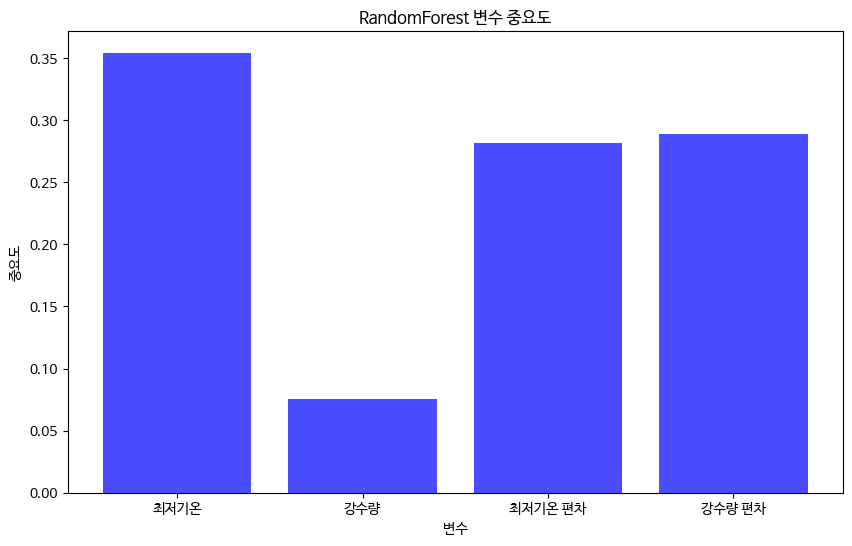

In [ ]:
import matplotlib.pyplot as plt

# 변수 중요도 출력
feature_importances = model.feature_importances_

# 시각화
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances, color='blue', alpha=0.7)
plt.xlabel('변수')
plt.ylabel('중요도')
plt.title('RandomForest 변수 중요도')
plt.show()


# 피해면적 시각화

In [ ]:
apple = pd.read_excel('/content/drive/MyDrive/KDI/지역별 사과 피해규모.xlsx')

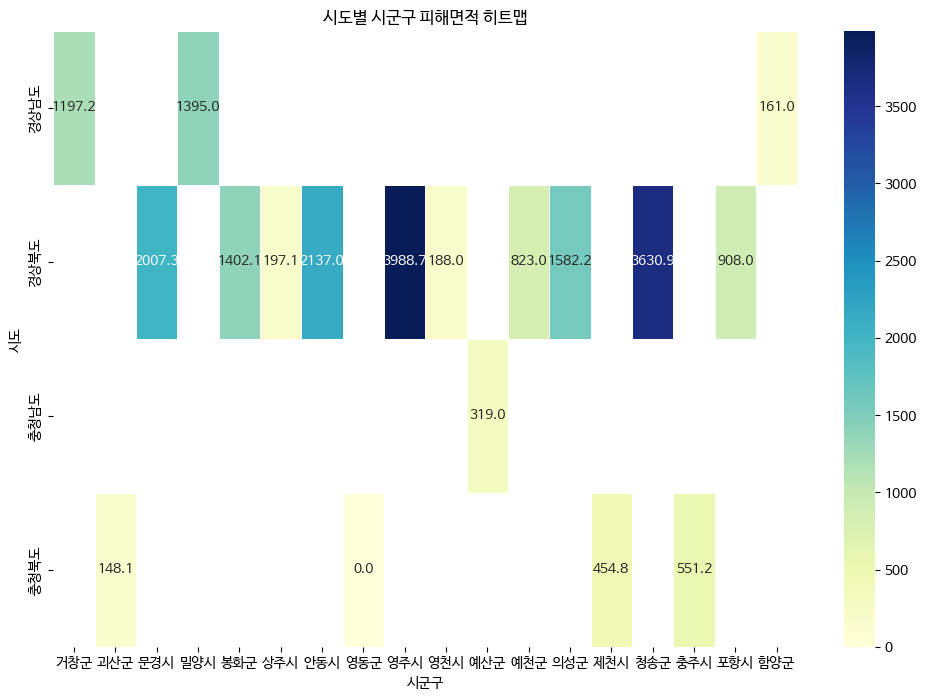

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 피벗 테이블로 데이터 형태 변경
heatmap_data = apple.pivot_table(values='피해면적', index='시도', columns='시군구')

# 히트맵 생성
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('시도별 시군구 피해면적 히트맵')
plt.show()


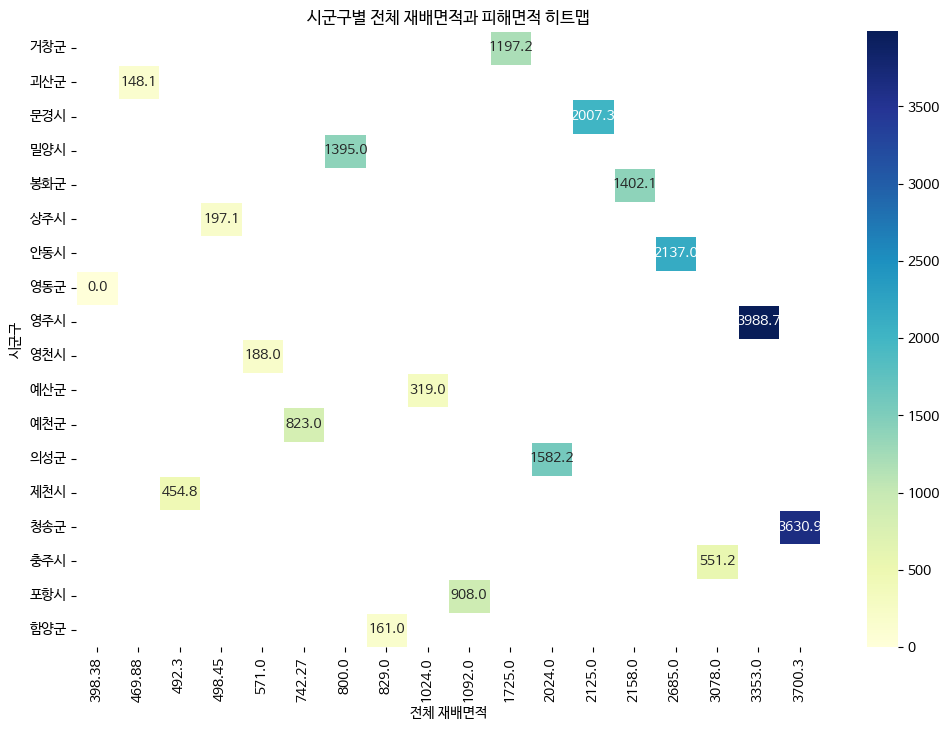

In [ ]:
heatmap = apple.pivot_table(values='피해면적', index='시군구', columns='전체 재배면적')

# 히트맵 생성
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('시군구별 전체 재배면적과 피해면적 히트맵')
plt.show()


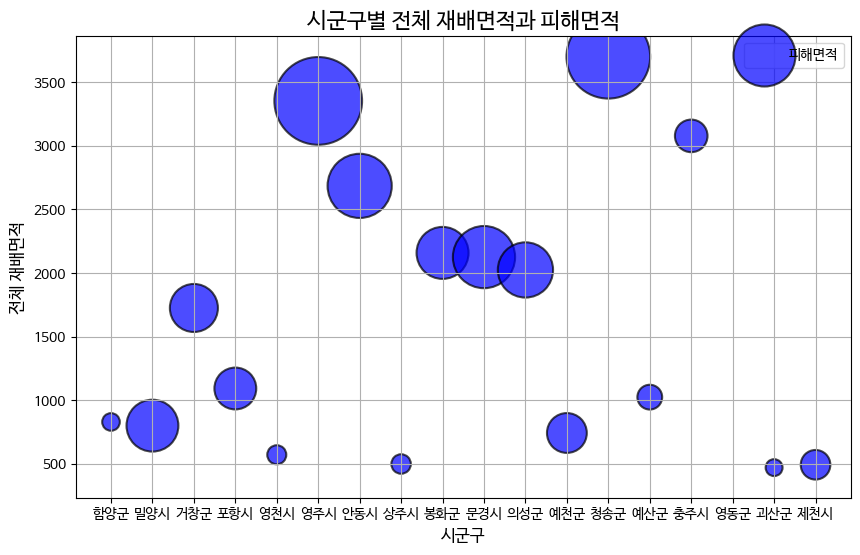

In [ ]:
#버블차트


# 버블 차트 그리기
plt.figure(figsize=(10, 6))
plt.scatter(apple['시군구'], apple['전체 재배면적'], s=apple['피해면적'], alpha=0.7, c='blue', edgecolors='black', linewidths=1.5)

# 차트 제목과 축 레이블 설정
plt.title('시군구별 전체 재배면적과 피해면적', fontsize=16)
plt.xlabel('시군구', fontsize=12)
plt.ylabel('전체 재배면적', fontsize=12)

# 범례 추가
plt.legend(['피해면적'], loc='upper right')

# 그리드 추가
plt.grid(True)

# 차트 출력
plt.show()


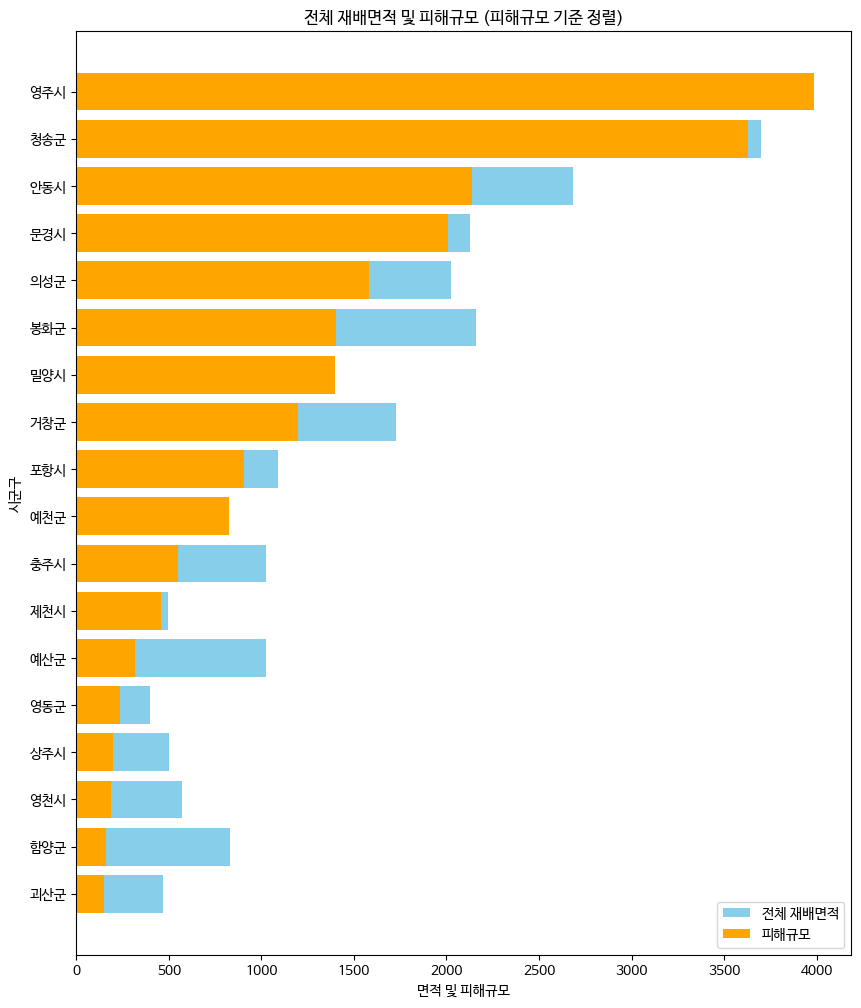

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터
data = {
    '시군구': ['함양군', '밀양시', '거창군', '포항시', '영천시', '영주시', '안동시', '상주시', '봉화군', '문경시', '의성군', '예천군', '청송군', '예산군', '충주시', '영동군', '괴산군', '제천시'],
    '전체 재배면적': [829, 800, 1725, 1092, 571, 3353, 2685, 498.45, 2158, 2125, 2024, 742.27, 3700.3, 1024, 1026, 398.38, 469.88, 492.3],
    '피해규모': [161, 1395, 1197.25, 908, 188, 3988.7, 2137, 197.1, 1402.1, 2007.3, 1582.1776, 822.99, 3630.9, 319, 551.2, 235.83, 148.07, 454.8]
}

df = pd.DataFrame(data)

# 피해규모 기준으로 정렬
df_sorted = df.sort_values(by='피해규모', ascending=True)

# 시각화
plt.figure(figsize=(10, 12))

# 전체 재배면적 막대그래프
bar1 = plt.barh(df_sorted['시군구'], df_sorted['전체 재배면적'], color='skyblue', label='전체 재배면적')

# 피해규모 막대그래프
bar2 = plt.barh(df_sorted['시군구'], df_sorted['피해규모'], color='orange', label='피해규모')

plt.title('전체 재배면적 및 피해규모 (피해규모 기준 정렬)')
plt.xlabel('면적 및 피해규모')
plt.ylabel('시군구')
plt.legend()

plt.show()


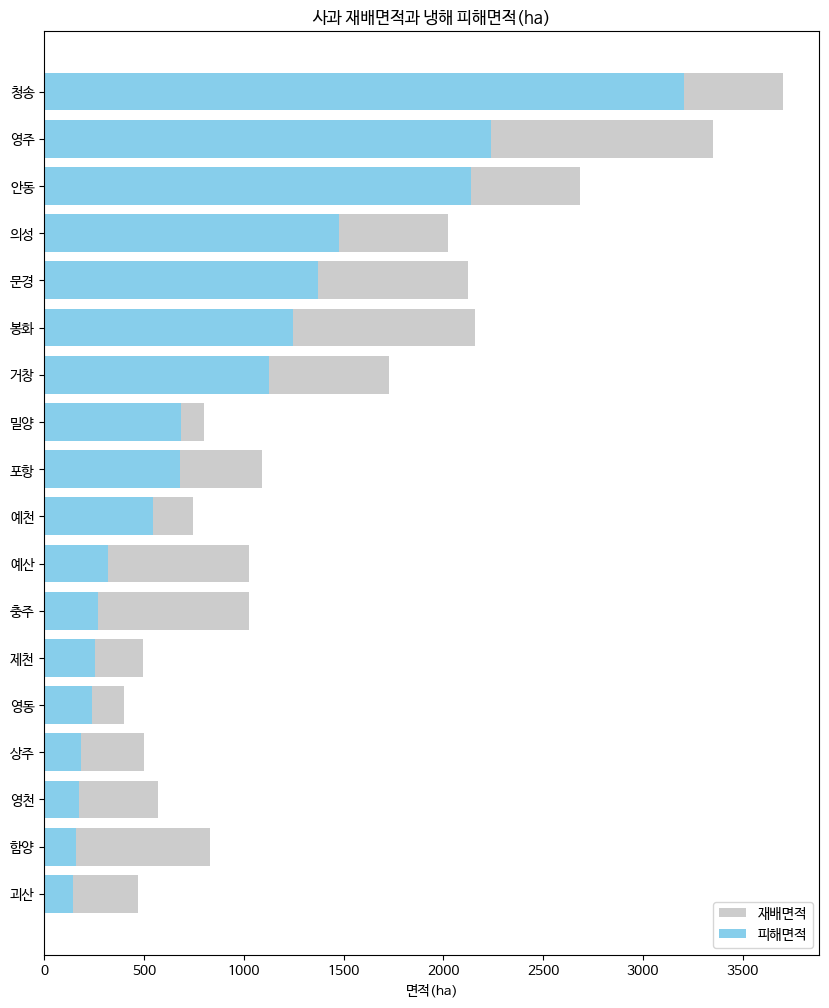

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터
data = {
    '지역': ['청송', '영주', '안동', '의성', '문경', '봉화', '거창', '밀양', '포항', '예천', '예산', '충주', '제천', '영동', '상주', '영천', '함양', '괴산'],
    '전체 재배면적': [3700.3, 3353, 2685, 2024, 2125, 2158, 1725, 800, 1092, 742.27, 1024, 1026, 492.3, 398.38, 498.45, 571, 829, 469.88],
    '냉해 피해면적': [3206, 2238.60, 2137, 1476.2512, 1372.70, 1247, 1128, 683, 681, 545.94, 316, 269, 253.8, 235.83, 183.7, 175, 158, 141.46]
}

df = pd.DataFrame(data)

# 피해규모 기준으로 정렬
df_sorted = df.sort_values(by='냉해 피해면적', ascending=True)

# 시각화
plt.figure(figsize=(10, 12))

# 전체 재배면적 막대그래프
bar1 = plt.barh(df_sorted['지역'], df_sorted['전체 재배면적'], color='gray', alpha = 0.4, label='재배면적')

# 피해규모 막대그래프
bar2 = plt.barh(df_sorted['지역'], df_sorted['냉해 피해면적'], color='skyblue', label='피해면적')

plt.title('사과 재배면적과 냉해 피해면적(ha)')
plt.xlabel('면적(ha)')
plt.legend()

plt.show()


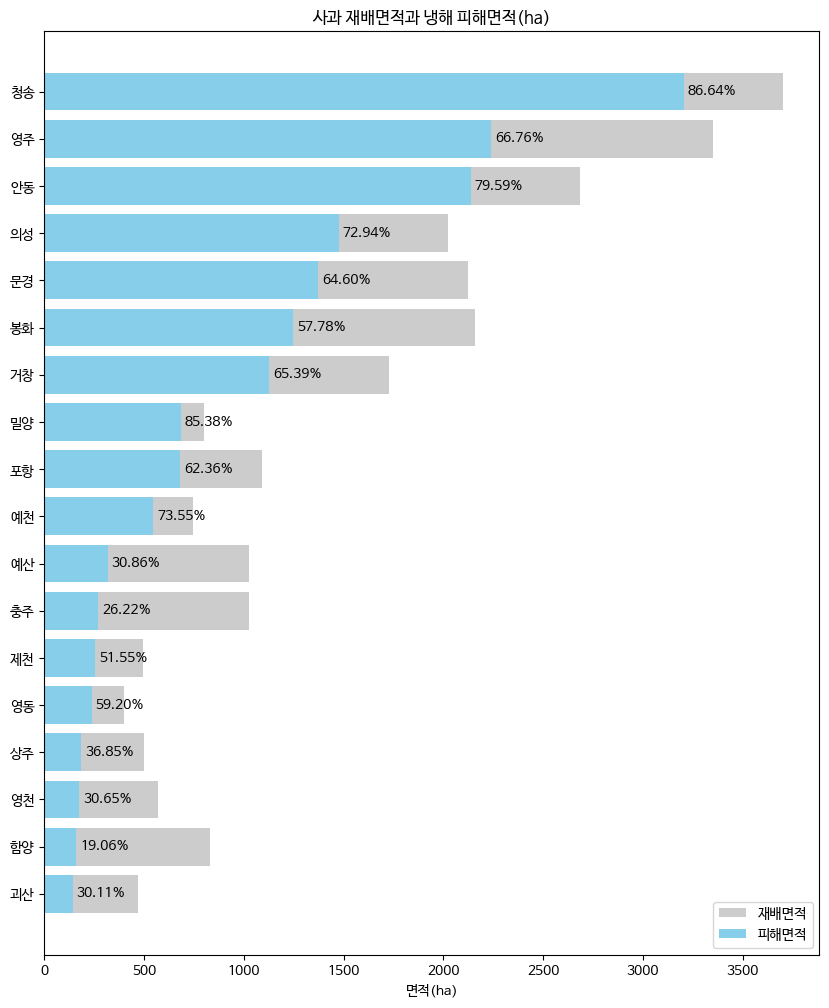

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터
data = {
    '지역': ['청송', '영주', '안동', '의성', '문경', '봉화', '거창', '밀양', '포항', '예천', '예산', '충주', '제천', '영동', '상주', '영천', '함양', '괴산'],
    '전체 재배면적': [3700.3, 3353, 2685, 2024, 2125, 2158, 1725, 800, 1092, 742.27, 1024, 1026, 492.3, 398.38, 498.45, 571, 829, 469.88],
    '냉해 피해면적': [3206, 2238.60, 2137, 1476.2512, 1372.70, 1247, 1128, 683, 681, 545.94, 316, 269, 253.8, 235.83, 183.7, 175, 158, 141.46]
}

df = pd.DataFrame(data)

# 비율 계산
df['비율'] = (df['냉해 피해면적'] / df['전체 재배면적']) * 100

# 피해규모 기준으로 정렬
df_sorted = df.sort_values(by='냉해 피해면적', ascending=True)

# 시각화
plt.figure(figsize=(10, 12))

# 전체 재배면적 막대그래프
bar1 = plt.barh(df_sorted['지역'], df_sorted['전체 재배면적'], color='gray', alpha=0.4, label='재배면적')

# 냉해 피해면적 막대그래프
bar2 = plt.barh(df_sorted['지역'], df_sorted['냉해 피해면적'], color='skyblue', label='피해면적')

# 비율 레이블 추가
for index, value in enumerate(df_sorted['비율']):
    plt.text(df_sorted['냉해 피해면적'].iloc[index] + 20, index, f'{value:.2f}%', va='center', fontsize=10)

plt.title('사과 재배면적과 냉해 피해면적(ha)')
plt.xlabel('면적(ha)')
plt.legend()

plt.show()
